In [1]:
from ccDGImaging import Renderer, Caves, Catacombs, np, cv, catacombsTileKeys, cavesTileKeys

In [2]:
from matplotlib import pyplot as plot

In [3]:
plot.rcParams["figure.figsize"] = (12, 9)

In [4]:
print(catacombsTileKeys)

('hall', 'floor', 'wall', 'door')


In [20]:
myTileInfo = {
    "hall" : {
        "files" : [
            "./tileGen/charliesChoice/DIRT/DIRT-BRONZEDARK-" + str(n) + ".png"
            for n in (25, 50, 75)
        ]
    },
    "floor" : {
        "files" : [
            "./tileGen/charliesChoice/TILE/TILE-CORN" + shade + "-B-E_N_S_W-D-" + diag + ".png"
            for shade in ("BRIGHT", "DARK")
            for diag in ("NE_NW_SE_SW", "NE_NW_SE", "NE_NW_SW", "NE_SE_SW", "NE_SW", "NW_SE", "NW_SE_SW")
        ],
        "probs" : [0.3, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.1, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025]
    },
    "wall" : {
        "files" : [
            "./tileGen/charliesChoice/BRICK/BRICK-BLUEDARK-horiz" + str(h) + "-vert" + str(v) + ".png"
            for h in [3] for v in (2, 4)
        ],
        "probs" : [0.2, 0.8]
    },
    "door" : {
        "files" : ["./tileGen/charliesChoice/TILE/TILE-SKYBRIGHT-B-E_N_S_W-D-NE_NW_SE_SW.png"]
    }
}
myTileInfo

{'hall': {'files': ['./tileGen/charliesChoice/DIRT/DIRT-BRONZEDARK-25.png',
   './tileGen/charliesChoice/DIRT/DIRT-BRONZEDARK-50.png',
   './tileGen/charliesChoice/DIRT/DIRT-BRONZEDARK-75.png']},
 'floor': {'files': ['./tileGen/charliesChoice/TILE/TILE-CORNBRIGHT-B-E_N_S_W-D-NE_NW_SE_SW.png',
   './tileGen/charliesChoice/TILE/TILE-CORNBRIGHT-B-E_N_S_W-D-NE_NW_SE.png',
   './tileGen/charliesChoice/TILE/TILE-CORNBRIGHT-B-E_N_S_W-D-NE_NW_SW.png',
   './tileGen/charliesChoice/TILE/TILE-CORNBRIGHT-B-E_N_S_W-D-NE_SE_SW.png',
   './tileGen/charliesChoice/TILE/TILE-CORNBRIGHT-B-E_N_S_W-D-NE_SW.png',
   './tileGen/charliesChoice/TILE/TILE-CORNBRIGHT-B-E_N_S_W-D-NW_SE.png',
   './tileGen/charliesChoice/TILE/TILE-CORNBRIGHT-B-E_N_S_W-D-NW_SE_SW.png',
   './tileGen/charliesChoice/TILE/TILE-CORNDARK-B-E_N_S_W-D-NE_NW_SE_SW.png',
   './tileGen/charliesChoice/TILE/TILE-CORNDARK-B-E_N_S_W-D-NE_NW_SE.png',
   './tileGen/charliesChoice/TILE/TILE-CORNDARK-B-E_N_S_W-D-NE_NW_SW.png',
   './tileGen/charlies

In [6]:
import os

In [7]:
for k in catacombsTileKeys:
    for f in myTileInfo[k]["files"]:
        print(os.path.exists(f), f)

True ./tileGen/charliesChoice/DIRT/DIRT-BRONZEDARK-25.png
True ./tileGen/charliesChoice/DIRT/DIRT-BRONZEDARK-50.png
True ./tileGen/charliesChoice/DIRT/DIRT-BRONZEDARK-75.png
True ./tileGen/charliesChoice/TILE/TILE-CORNBRIGHT-B-E_N_S_W-D-NE_NW_SE_SW.png
True ./tileGen/charliesChoice/TILE/TILE-CORNBRIGHT-B-E_N_S_W-D-NE_NW_SE.png
True ./tileGen/charliesChoice/TILE/TILE-CORNBRIGHT-B-E_N_S_W-D-NE_NW_SW.png
True ./tileGen/charliesChoice/TILE/TILE-CORNBRIGHT-B-E_N_S_W-D-NE_SE_SW.png
True ./tileGen/charliesChoice/TILE/TILE-CORNBRIGHT-B-E_N_S_W-D-NE_SW.png
True ./tileGen/charliesChoice/TILE/TILE-CORNBRIGHT-B-E_N_S_W-D-NW_SE.png
True ./tileGen/charliesChoice/TILE/TILE-CORNBRIGHT-B-E_N_S_W-D-NW_SE_SW.png
True ./tileGen/charliesChoice/TILE/TILE-CORNDARK-B-E_N_S_W-D-NE_NW_SE_SW.png
True ./tileGen/charliesChoice/TILE/TILE-CORNDARK-B-E_N_S_W-D-NE_NW_SE.png
True ./tileGen/charliesChoice/TILE/TILE-CORNDARK-B-E_N_S_W-D-NE_NW_SW.png
True ./tileGen/charliesChoice/TILE/TILE-CORNDARK-B-E_N_S_W-D-NE_SE_SW.pn

In [8]:
?Catacombs

Init signature:
Catacombs(
    w: int,
    h: int,
    rct: int,
    raap: float,
    varix: int,
    variy: int,
    conn: int,
    doShift: bool,
    padx: int = 0,
    pady: int = 0,
    thick: int = 1,
    varih: int = 0,
)
Docstring:      Nethack style dungeon
File:           ~/Desktop/ccDunGen/ccDGLevels.py
Type:           type
Subclasses:     


In [9]:
myDungeon = Catacombs(80, 48, 5, 0.08, 8, 3, 3, True, 5, 5, 2, 1)
myDungeon

A 80 wide by 48 tall dungeon,
with 5 rooms of about 08% average area each,
or of average dimension 22 wide by 13 tall,
with an average of 3 hallways out of each room;
Rooms are padded by at least 5 East-West & 5 North-South,
and have a length variance of +/-8 wide and +/- 3 tall.

In [10]:
myDungeon.genRooms(True)

[-4 -3] (18, 10) (30, 12)
A   18 by   10 Rectangle cornered at (  30,   12).
A   28 by   20 Rectangle cornered at (  25,    7).

[7 0] (29, 13) (36, 31)
A   29 by   13 Rectangle cornered at (  36,   31).
A   39 by   23 Rectangle cornered at (  31,   26).

[-1  3] (21, 16) (56, 4)
A   21 by   16 Rectangle cornered at (  56,    4).
A   31 by   26 Rectangle cornered at (  51,    0).

[ 1 -1] (23, 12) (0, 28)
A   23 by   12 Rectangle cornered at (   0,   28).
A   33 by   22 Rectangle cornered at (   0,   23).

[-3 -2] (19, 11) (1, 8)
A   19 by   11 Rectangle cornered at (   1,    8).
A   29 by   21 Rectangle cornered at (   0,    3).

Attemped room generations 283 times.


In [11]:
myDungeon.genHalls(True)

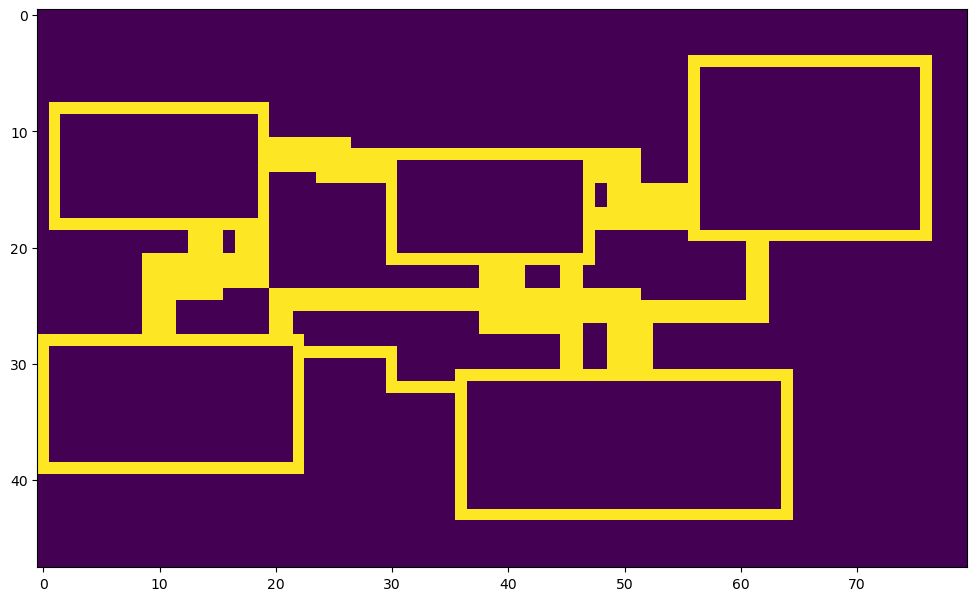

In [12]:
plot.imshow(myDungeon.draw())

In [13]:
?Renderer

Init signature:
Renderer(
    dungeon,
    tileInfo: dict,
    tileResX: int,
    tileResY: int = 0,
    alphaChannel: bool = False,
)
Init docstring:
Requires a constructed dungeon, a tile information dictionary,
and a resolution size of each tile. Optionally,
non-square tiles can be specified with a Y-resolution,
and it can be specified if an alpha channel should be used.
File:           ~/Desktop/ccDunGen/ccDGImaging.py
Type:           type
Subclasses:     


In [21]:
myRenderer = Renderer(myDungeon, myTileInfo, 16)

In [22]:
[(k, myRenderer.tiles[k]["probabilities"]) for k in catacombsTileKeys]

[('hall', array([0.   , 0.333, 0.667, 1.   ])),
 ('floor',
  array([0.   , 0.3  , 0.375, 0.45 , 0.525, 0.6  , 0.675, 0.75 , 0.85 , 0.875, 0.9  , 0.925, 0.95 , 0.975, 1.   ])),
 ('wall', array([0. , 0.2, 1. ])),
 ('door', array([0., 1.]))]

In [23]:
[(k, myRenderer.tiles[k]["variants"], len(myRenderer.tiles[k]["probabilities"])) for k in catacombsTileKeys]

[('hall', 3, 4), ('floor', 14, 15), ('wall', 2, 3), ('door', 1, 2)]

In [24]:
myRenderer.render(True)

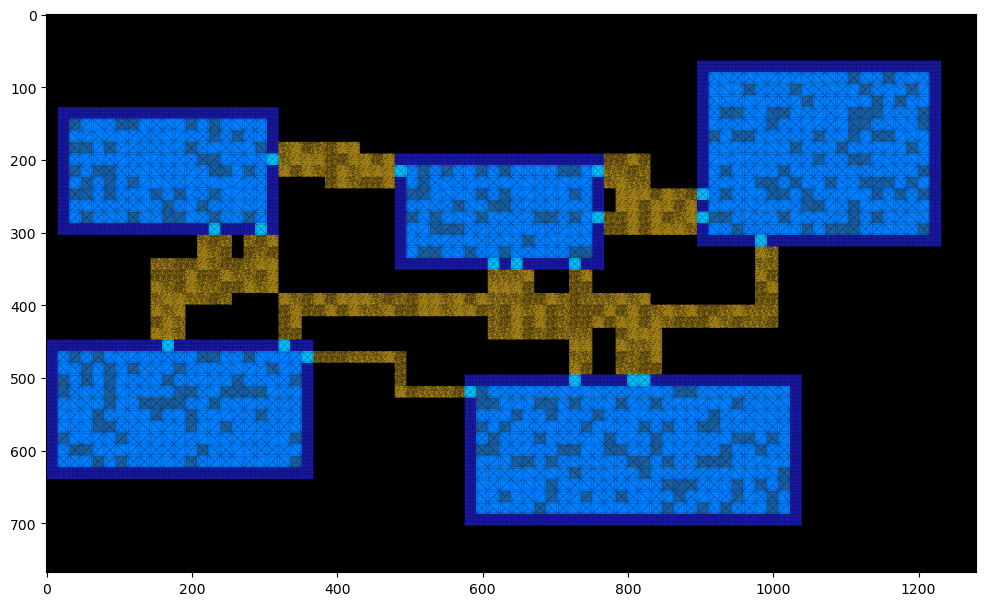

In [25]:
plot.imshow(myRenderer.image[:, :, ::-1])

In [ ]:
catacombsTileKeys

In [ ]:
cavesTileKeys

In [27]:
#cv.imwrite("myFirstDungeon.png", myRenderer.image)